# Maestría en Economía Aplicada - UBA

## Taller de Programación

## Trabajo Práctico 2

## Docente: Noelia Romero

## Grupo No 5

## Cammisi, Andrés // Porco, Matías // Pineda, David

# Parte 0
## Preparación de la base de datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
import os

# Cambiar directorio de trabajo
os.chdir('C:\\Users\\Matias\\Desktop\\Taller de Programación\\Grupo_5_UBA_2025')

# Verificar que funcionó
print("Directorio actual:", os.getcwd())

Directorio actual: C:\Users\Matias\Desktop\Taller de Programación\Grupo_5_UBA_2025


In [9]:
# ------------------------------------------------------------
# Carga de la base EPH 2005 
# ------------------------------------------------------------

base_2005 = pd.read_stata('Individual_t105.dta', convert_categoricals=False)

print("Dimensiones base 2005:", base_2005.shape)
base_2005.head()

Dimensiones base 2005: (47030, 176)


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000


In [10]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2005 = base_2005[base_2005['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2005.shape)

Dimensiones tras filtrar Región Pampeana: (14651, 176)


In [11]:
# ------------------------------------------------------------
# Ajustar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2005.columns = base_2005.columns.str.lower()

# ------------------------------------------------------------
# Seleccionar variables de interés
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08',
    'ch12', 'ch13', 'ch14', 'nivel_ed', 'estado', 'cat_inac', 'itf', 'ipcf',
    'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph05 = base_2005[vars_interes].copy()

print("Dimensiones del subconjunto:", eph05.shape)
eph05.head()

Dimensiones del subconjunto: (14651, 23)


,codusu,nro_hogar,ch03,ch04,ch06,ch07,ch08,ch12,ch13,ch14,...,itf,ipcf,pondera,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
29150,125082,1.0,1.0,1.0,28.0,2.0,4.0,2.0,1.0,,...,840.0,280.0,377.0,3.0,0.0,72.0,0.0,2.0,4.0,0.0
29151,125082,1.0,2.0,2.0,30.0,2.0,1.0,6.0,1.0,,...,840.0,280.0,377.0,3.0,2.0,30.0,12.0,1.0,6.0,0.0
29152,125082,1.0,3.0,1.0,4.0,5.0,1.0,1.0,2.0,01,...,840.0,280.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29153,125283,1.0,1.0,1.0,66.0,2.0,2.0,4.0,2.0,03,...,4300.0,1075.0,283.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0
29154,125283,1.0,2.0,2.0,60.0,2.0,2.0,4.0,2.0,02,...,4300.0,1075.0,283.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0


In [12]:
list(eph05.columns)

['codusu',
 'nro_hogar',
 'ch03',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'ch12',
 'ch13',
 'ch14',
 'nivel_ed',
 'estado',
 'cat_inac',
 'itf',
 'ipcf',
 'pondera',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

In [13]:
# ------------------------------------------------------------
# Copia de la base 2005
# ------------------------------------------------------------
eph05_raw = eph05.copy()

# ------------------------------------------------------------
# Revisión rápida de rangos y valores inusuales previo a la limpieza
# ------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = [
    "ipcf", "itf", "pp3e_tot", "pp3f_tot", "pp03d",
    "ch06", "ch12", "ch13", "ch14", "pondera"
]

perfil_num(eph05, num_vars)

,var,n,n_na,min,p1,p50,p99,max,n_negativos,n_cero
5,ch06,14651,0,-1.0,-1.0,29.000000,84.0,98.0,205,0
6,ch12,14651,0,0.0,0.0,3.000000,7.0,99.0,0,1019
7,ch13,14651,0,0.0,0.0,2.000000,2.0,9.0,0,1019
8,ch14,14651,7073,0.0,0.0,3.000000,98.0,99.0,0,1099
0,ipcf,14651,0,0.0,0.0,266.666667,1800.0,11300.0,0,170
1,itf,14651,0,0.0,0.0,958.000000,5600.0,30000.0,0,170
9,pondera,14651,0,35.0,92.0,341.000000,861.0,2268.0,0,0
4,pp03d,14651,0,0.0,0.0,0.000000,2.0,9.0,0,14217
2,pp3e_tot,14651,0,0.0,0.0,0.000000,84.0,999.0,0,9376
3,pp3f_tot,14651,0,0.0,0.0,0.000000,20.0,999.0,0,14232


In [14]:
# ------------------------------------------------------------
# Limpieza final — EPH 2005
# ------------------------------------------------------------
eph05_clean = eph05.copy()

# ------------------------------------------------------------
# 1. Edad (ch06): valores negativos -> 0
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["ch06"] < 0, "ch06"] = 0

# ------------------------------------------------------------
# 2. Horas trabajadas (pp03d): filtrar valores atípicos
# ------------------------------------------------------------
eph05_clean.loc[(eph05_clean["pp03d"] < 0) | (eph05_clean["pp03d"] > 120), "pp03d"] = np.nan

# ------------------------------------------------------------
# 3. Ingresos laborales (pp3e_tot y pp3f_tot):
#     códigos 9, 99, 999, 9999, 99999 → NaN
# ------------------------------------------------------------
for v in ["pp3e_tot", "pp3f_tot"]:
    eph05_clean[v + "_missing"] = eph05_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    eph05_clean.loc[eph05_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 4. Ingreso per cápita e ITF: eliminar negativos
# ------------------------------------------------------------
for v in ["ipcf", "itf"]:
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 5. Ponderador: debe ser positivo
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["pondera"] <= 0, "pondera"] = np.nan

# ------------------------------------------------------------
# 6. Educación (ch12–ch14): limpiar códigos especiales
# ------------------------------------------------------------
for c in ["ch12", "ch13", "ch14"]:
    eph05_clean[c] = pd.to_numeric(eph05_clean[c], errors="coerce")

# ch12: valores 0 o 9 (educación especial o sin nivel) → NA
eph05_clean.loc[eph05_clean["ch12"].isin([0, 9, 99]), "ch12"] = np.nan

# ch13: mantener solo {1,2}, el resto → NA
eph05_clean.loc[~eph05_clean["ch13"].isin([1, 2]), "ch13"] = np.nan

# ch14: mantener 0–9; eliminar 98/99 y no válidos
eph05_clean.loc[~eph05_clean["ch14"].isin(range(0, 10)), "ch14"] = np.nan

# ------------------------------------------------------------
# 7. Resumen de limpieza
# ------------------------------------------------------------
resumen_limpieza = pd.DataFrame({
    "NAs antes": eph05.isna().sum(),
    "NAs después": eph05_clean.isna().sum(),
    "Nuevos NAs": eph05_clean.isna().sum() - eph05.isna().sum()
})

print("Limpieza completada.\n")
display(resumen_limpieza)




Limpieza completada.



,NAs antes,NAs después,Nuevos NAs
cat_inac,0.0,0,0.0
cat_ocup,0.0,0,0.0
ch03,0.0,0,0.0
ch04,0.0,0,0.0
ch06,0.0,0,0.0
ch07,0.0,0,0.0
ch08,0.0,0,0.0
ch12,0.0,1071,1071.0
ch13,0.0,1021,1021.0
ch14,0.0,7166,7166.0


In [16]:
# Cambiar directorio de trabajo
os.chdir('C:\\Users\\Matias\\Desktop\\Taller de Programación\\Grupo_5_UBA_2025//TP2')

# Verificar que funcionó
print("Directorio actual:", os.getcwd())

Directorio actual: C:\Users\Matias\Desktop\Taller de Programación\Grupo_5_UBA_2025\TP2


In [17]:
# ------------------------------------------------------------
# Carga base de hogar 2005
# ------------------------------------------------------------
hogar_2005 = pd.read_stata("Hogar_t105.dta", convert_categoricals=False)
hogar_2005.columns = hogar_2005.columns.str.lower()

print("Dimensiones base hogar 2005:", hogar_2005.shape)
print("Columnas disponibles (primeras 20):", list(hogar_2005.columns)[:20])

# ------------------------------------------------------------
# Seleccionar solo las variables necesarias del hogar
# ------------------------------------------------------------
vars_hogar = ["codusu", "nro_hogar", "ix_tot"]
vars_hogar = [v for v in vars_hogar if v in hogar_2005.columns]
hogar_2005_sel = hogar_2005[vars_hogar].copy()

print("Variables seleccionadas:", list(hogar_2005_sel.columns))
print("Dimensiones base hogar seleccionada:", hogar_2005_sel.shape)

# ------------------------------------------------------------
# Unión con base individual limpia
# ------------------------------------------------------------
eph05_merge = pd.merge(
    eph05_clean,
    hogar_2005_sel,
    on=["codusu", "nro_hogar"],
    how="left",
    validate="m:1"  # cada hogar aparece una sola vez en la base de hogares
)

# ------------------------------------------------------------
# Renombrar IX_TOT como miembros_hogar (para consistencia TP2)
# ------------------------------------------------------------
eph05_merge = eph05_merge.rename(columns={"ix_tot": "miembros_hogar"})

# ------------------------------------------------------------
# Verificar resultado
# ------------------------------------------------------------
print("\nDimensiones tras merge:", eph05_merge.shape)
print("Proporción de hogares sin IX_TOT:", eph05_merge["miembros_hogar"].isna().mean().round(3))
print("Ejemplo de columnas finales:", eph05_merge[["codusu","nro_hogar","miembros_hogar"]].head())



Dimensiones base hogar 2005: (13597, 88)
Columnas disponibles (primeras 20): ['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8']
Variables seleccionadas: ['codusu', 'nro_hogar', 'ix_tot']
Dimensiones base hogar seleccionada: (13597, 3)

Dimensiones tras merge: (14651, 26)
Proporción de hogares sin IX_TOT: 0.0
Ejemplo de columnas finales:      codusu  nro_hogar  miembros_hogar
0  125082          1.0             3.0
1  125082          1.0             3.0
2  125082          1.0             3.0
3  125283          1.0             4.0
4  125283          1.0             4.0


In [18]:
# ------------------------------------------------------------
# Guardar base final 2005 limpia y unificada
# ------------------------------------------------------------

eph05_final = eph05_merge.copy()
eph05_final["anio"] = 2005
eph05_final.to_csv("eph_2005_final.csv", index=False)

print("Guardado: eph_2005_final.csv", eph05_final.shape)


Guardado: eph_2005_final.csv (14651, 27)


In [19]:
# ------------------------------------------------------------
# Carga base individual 2025
# ------------------------------------------------------------
ind_2025 = pd.read_excel("usu_individual_T125.xlsx")
ind_2025.columns = ind_2025.columns.str.lower()

print("Dimensiones base individual 2025:", ind_2025.shape)
print("Primeras columnas:", list(ind_2025.columns)[:20])

# ------------------------------------------------------------
# Filtrar Región Pampeana (código 43, igual que en 2005)
# ------------------------------------------------------------
ind_2025["region"] = pd.to_numeric(ind_2025["region"], errors="coerce")
ind_2025 = ind_2025[ind_2025["region"] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", ind_2025.shape)
print("Valores únicos en region:", ind_2025["region"].unique())

Dimensiones base individual 2025: (45425, 235)
Primeras columnas: ['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12']
Dimensiones tras filtrar Región Pampeana: (13803, 235)
Valores únicos en region: [43]


In [21]:
# ------------------------------------------------------------
# Selección de variables de interés
# ------------------------------------------------------------
vars_interes_2025 = [
    "codusu", "nro_hogar", "ch03", "ch04", "ch06", "ch07", "ch08",
    "ch12", "ch13", "ch14",
    "nivel_ed", "estado", "cat_inac", "itf", "ipcf",
    "pondera", "cat_ocup", "pp03d", "pp3e_tot", 
    "pp3f_tot", "pp04a", "pp04c", "pp10a"
]

# Filtrar columnas existentes (por si alguna falta)
vars_exist = [v for v in vars_interes_2025 if v in ind_2025.columns]
eph25 = ind_2025[vars_exist].copy()

print("Dimensiones del subconjunto 2025:", eph25.shape)
print("Columnas seleccionadas:", list(eph25.columns))


Dimensiones del subconjunto 2025: (13803, 23)
Columnas seleccionadas: ['codusu', 'nro_hogar', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 'nivel_ed', 'estado', 'cat_inac', 'itf', 'ipcf', 'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp04a', 'pp04c', 'pp10a']


In [22]:
# ------------------------------------------------------------
# Limpieza final — EPH 2025
# ------------------------------------------------------------
eph25_clean = eph25.copy()

# 1. Edad (ch06): valores negativos -> 0
eph25_clean.loc[eph25_clean["ch06"] < 0, "ch06"] = 0

# 2. Horas trabajadas (pp03d): filtrar valores atípicos
eph25_clean.loc[(eph25_clean["pp03d"] < 0) | (eph25_clean["pp03d"] > 120), "pp03d"] = np.nan

# 3. Ingresos laborales (pp3e_tot y pp3f_tot): códigos 9, 99, 999... → NaN
for v in ["pp3e_tot", "pp3f_tot"]:
    eph25_clean[v + "_missing"] = eph25_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    eph25_clean.loc[eph25_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# 4. Ingreso total e IPCF: eliminar negativos
for v in ["ipcf", "itf"]:
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# 5. Ponderador: debe ser positivo
eph25_clean.loc[eph25_clean["pondera"] <= 0, "pondera"] = np.nan

print("Limpieza completada. Dimensiones:", eph25_clean.shape)


Limpieza completada. Dimensiones: (13803, 25)


In [23]:
# ------------------------------------------------------------
# Carga base de hogar 2025
# ------------------------------------------------------------
hogar_2025 = pd.read_excel("usu_hogar_T125.xlsx")
hogar_2025.columns = hogar_2025.columns.str.lower()

print("Dimensiones base hogar 2025:", hogar_2025.shape)
print("Columnas disponibles (primeras 20):", list(hogar_2025.columns)[:20])

# Seleccionar y unir IX_Tot
vars_hogar_2025 = ["codusu", "nro_hogar", "ix_tot"]
vars_hogar_2025 = [v for v in vars_hogar_2025 if v in hogar_2025.columns]
hogar_2025_sel = hogar_2025[vars_hogar_2025].copy()

# Merge
eph25_merge = pd.merge(
    eph25_clean,
    hogar_2025_sel,
    on=["codusu","nro_hogar"],
    how="left",
    validate="m:1"
)

# Renombrar
eph25_merge = eph25_merge.rename(columns={"ix_tot": "miembros_hogar"})
print("\nDimensiones tras merge:", eph25_merge.shape)
print("Proporción de hogares sin IX_Tot:", eph25_merge["miembros_hogar"].isna().mean().round(3))
print(eph25_merge[["codusu","nro_hogar","miembros_hogar"]].head())


Dimensiones base hogar 2025: (15984, 98)
Columnas disponibles (primeras 20): ['codusu', 'ano4', 'trimestre', 'nro_hogar', 'realizada', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8']

Dimensiones tras merge: (13803, 26)
Proporción de hogares sin IX_Tot: 0.0
                          codusu  nro_hogar  miembros_hogar
0  TQRMNOVQVHJOLOCDEFKID00875778          1               5
1  TQRMNOVQVHJOLOCDEFKID00875778          1               5
2  TQRMNOVQVHJOLOCDEFKID00875778          1               5
3  TQRMNOVQVHJOLOCDEFKID00875778          1               5
4  TQRMNOUPQHLOLOCDEFKID00851757          1               3


In [24]:
# ------------------------------------------------------------
# Guardar base final 2025 limpia y unificada
# ------------------------------------------------------------
eph25_final = eph25_merge.copy()
eph25_final["anio"] = 2025
eph25_final.to_csv("eph_2025_final.csv", index=False)

print("Guardado: eph_2025_final.csv", eph25_final.shape)

Guardado: eph_2025_final.csv (13803, 27)


In [25]:
# ------------------------------------------------------------
# Carga de las bases finales 2005 y 2025
# ------------------------------------------------------------
eph05 = pd.read_csv("eph_2005_final.csv", low_memory=False)
eph25 = pd.read_csv("eph_2025_final.csv", low_memory=False)

# Añadimos columna año
eph05["anio"] = 2005
eph25["anio"] = 2025

print("Dimensiones 2005:", eph05.shape)
print("Dimensiones 2025:", eph25.shape)

# ------------------------------------------------------------
# Homogeneizar nombres de columnas
# ------------------------------------------------------------
eph05.columns = eph05.columns.str.lower()
eph25.columns = eph25.columns.str.lower()

# Igualar columnas
cols_comunes = sorted(set(eph05.columns).intersection(eph25.columns))
eph05 = eph05[cols_comunes].copy()
eph25 = eph25[cols_comunes].copy()

# ------------------------------------------------------------
# Unir bases
# ------------------------------------------------------------
eph_panel = pd.concat([eph05, eph25], ignore_index=True)

print("\nDimensiones del panel combinado:", eph_panel.shape)
print("Años presentes:", eph_panel["anio"].value_counts().to_dict())

# ------------------------------------------------------------
# Guardar base unificada
# ------------------------------------------------------------
output_path_panel = "eph_tp2_05_25.csv"
eph_panel.to_csv(output_path_panel, index=False)

print(f"Panel EPH 2005–2025 guardado correctamente en: {output_path_panel}")
print("Variables incluidas:", eph_panel.columns.tolist())




Dimensiones 2005: (14651, 27)
Dimensiones 2025: (13803, 27)

Dimensiones del panel combinado: (28454, 27)
Años presentes: {2005: 14651, 2025: 13803}
Panel EPH 2005–2025 guardado correctamente en: eph_tp2_05_25.csv
Variables incluidas: ['anio', 'cat_inac', 'cat_ocup', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 'codusu', 'estado', 'ipcf', 'itf', 'miembros_hogar', 'nivel_ed', 'nro_hogar', 'pondera', 'pp03d', 'pp04a', 'pp04c', 'pp10a', 'pp3e_tot', 'pp3e_tot_missing', 'pp3f_tot', 'pp3f_tot_missing']


# Parte I
## Creación de variables - Histogramas - Kernels

In [29]:
# Cambiar directorio de trabajo
os.chdir('C:\\Users\\Matias\\Desktop\\Taller de Programación\\Grupo_5_UBA_2025//TP2')

# Verificar que funcionó
print("Directorio actual:", os.getcwd())

Directorio actual: C:\Users\Matias\Desktop\Taller de Programación\Grupo_5_UBA_2025\TP2


In [30]:
# ------------------------------------------------------------
# Carga de base consolidada, cálculo de Adulto Equivalente
# y creación de variable de pobreza 
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# Cargar base panel (una sola vez en el flujo)
df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# Tipos mínimos
df["anio"] = pd.to_numeric(df.get("anio"), errors="coerce")
df["itf"]  = pd.to_numeric(df.get("itf"),  errors="coerce")

# ------------------------------------------------------------
# 1. Calcular edad y edad²
# ------------------------------------------------------------
df["edad"] = pd.to_numeric(df.get("ch06"), errors="coerce")
df["edad2"] = df["edad"]**2

# ------------------------------------------------------------
# 2. Cargar tabla de adulto equivalente
# ------------------------------------------------------------
# Cambiar directorio de trabajo
os.chdir('C:\\Users\\Matias\\Desktop\\Taller de Programación\\Grupo_5_UBA_2025')

# Verificar que funcionó
print("Directorio actual:", os.getcwd())
tabla_ae_xlsx = "tabla_adulto_equiv.xlsx"
ae_raw = pd.read_excel(tabla_ae_xlsx, sheet_name=0, header=2)
ae_raw.columns = [str(c).strip() for c in ae_raw.columns]

# Detectar fila de encabezados
hdr_idx = ae_raw.index[ae_raw.iloc[:, 0].astype(str).str.strip().eq("Edad")][0]
ae = ae_raw.iloc[hdr_idx+1:].reset_index(drop=True)
ae.columns = ["Edad", "Mujeres", "Varones"]

# Mantener filas útiles y convertir a numérico
ae = ae[ae[["Mujeres", "Varones"]].apply(pd.to_numeric, errors="coerce").notna().any(axis=1)].copy()
ae["Mujeres"] = pd.to_numeric(ae["Mujeres"], errors="coerce")
ae["Varones"] = pd.to_numeric(ae["Varones"], errors="coerce")

# ------------------------------------------------------------
# 3. Etiquetar edades (según rangos del TP1)
# ------------------------------------------------------------
def etiqueta_edad(e):
    if pd.isna(e): return np.nan
    e = int(e)
    if e == 0:              return "Menor de 1 año"
    if 1 <= e <= 17:        return "1 año" if e == 1 else f"{e} años"
    if 18 <= e <= 29:       return "18 a 29 años"
    if 30 <= e <= 45:       return "30 a 45 años"
    if 46 <= e <= 60:       return "46 a 60 años"
    if 61 <= e <= 75:       return "61 a 75 años"
    return "más de 75 años"

df["etq_edad"] = df["edad"].apply(etiqueta_edad)

# --- Normalizador de texto para evitar mismatches sutiles ---
def _norm(s):
    s = str(s).strip().lower()
    s = (s.replace("á","a").replace("é","e").replace("í","i")
           .replace("ó","o").replace("ú","u").replace("ñ","n"))
    s = " ".join(s.split())
    return s

# ------------------------------------------------------------
# 4. Mapear equivalentes según sexo (con llaves normalizadas)
# ------------------------------------------------------------
ae["_edad_key"] = ae["Edad"].astype(str).map(_norm)
map_muj = dict(zip(ae["_edad_key"], ae["Mujeres"]))
map_var = dict(zip(ae["_edad_key"], ae["Varones"]))

df["sexo_cat"] = df["ch04"].map({1: "Varones", 2: "Mujeres"})
df["_etq_key"] = df["etq_edad"].astype(str).map(_norm)
df["ae_muj"] = df["_etq_key"].map(map_muj)
df["ae_var"] = df["_etq_key"].map(map_var)
df["adulto_equiv"] = np.where(df["sexo_cat"].eq("Varones"), df["ae_var"], df["ae_muj"])

# Diagnóstico rápido (opcional, mantener en desarrollo)
# print(f"AE faltante: {(df['adulto_equiv'].isna().mean()*100):.2f}%")

# ------------------------------------------------------------
# 5. Calcular Adulto Equivalente total por hogar
# ------------------------------------------------------------
hogar_keys = ["anio", "codusu", "nro_hogar"]
df["ad_equiv_hogar"] = df.groupby(hogar_keys)["adulto_equiv"].transform("sum")

# ------------------------------------------------------------
# 6. Crear variable de pobreza (definición TP1)
# ------------------------------------------------------------
cbt_map = {2005: 205.07, 2025: 365_177.0}
df["cbt_ae"] = df["anio"].map(cbt_map).astype(float)
df["ingreso_necesario"] = df["ad_equiv_hogar"] * df["cbt_ae"]

df["pobre"] = np.where(df["itf"] < df["ingreso_necesario"], 1, 0).astype(int)

# ------------------------------------------------------------
# 7. Resumen de resultados
# ------------------------------------------------------------
print("Distribución de pobreza (toda la muestra):")
print(df["pobre"].value_counts(normalize=True).mul(100).round(1))
print("\nTasa de pobreza por año:")
print(df.groupby("anio")["pobre"].mean().mul(100).round(1))



Directorio actual: C:\Users\Matias\Desktop\Taller de Programación\Grupo_5_UBA_2025
Distribución de pobreza (toda la muestra):
pobre
0    57.5
1    42.5
Name: proportion, dtype: float64

Tasa de pobreza por año:
anio
2005    29.8
2025    56.0
Name: pobre, dtype: float64


## Ejercicio 1. Creación de variable edad2

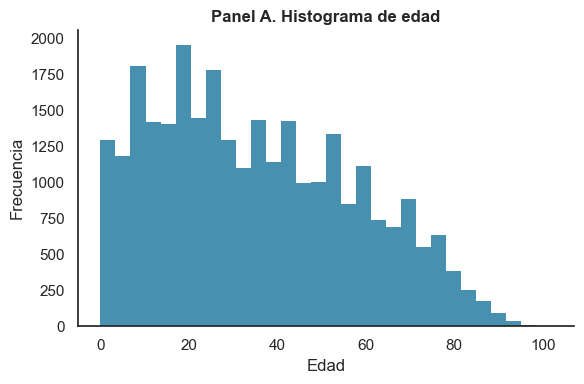

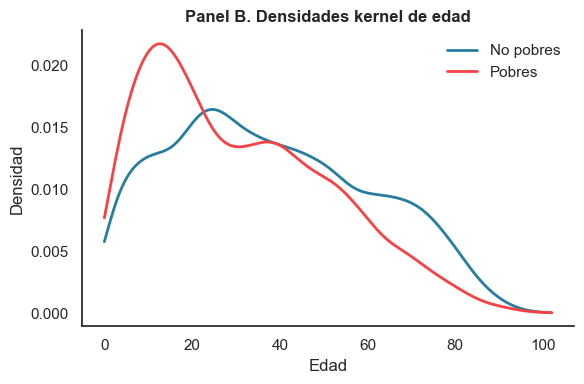

In [31]:
# ------------------------------------------------------------
# 1) Edad2 - Histogramas - Densidades 
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# === HEADER ESTRICTO (requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df  # creado en el bloque inicial (carga + AE + CBT + pobre)
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df` y `pobre`.")

if "pobre" not in df.columns:
    raise RuntimeError("Falta `pobre`. Ejecutá el bloque de AE+CBT+`pobre` antes de continuar.")
df["pobre"] = df["pobre"].astype(int)
#--------------------------------------------------------------------------------------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"] 

# --- Coherencia de variables mínimas (sin redefinir pobreza) ---
if "edad" not in df.columns:
    if "ch06" not in df.columns:
        raise KeyError("Falta 'edad' y tampoco existe 'ch06' para derivarla.")
    df["edad"] = pd.to_numeric(df["ch06"], errors="coerce")

df["edad"]  = pd.to_numeric(df["edad"], errors="coerce")
df["edad2"] = df["edad"]**2

if "pobre" not in df.columns:
    raise KeyError("Falta 'pobre'. Debe definirse antes (bloque de pobreza).")
df["pobre"] = df["pobre"].astype(int)  # binaria 0/1

# ------------------------------------------------------------
# Panel A: histograma de edad
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(
    df["edad"].dropna(), bins=30,
    color=palette_tp1[0], alpha=0.85, edgecolor="none"
)
ax.set_title("Panel A. Histograma de edad", fontsize=12, weight="bold")
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")
sns.despine(ax=ax)
ax.set_facecolor("white")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Panel B: densidades kernel por condición de pobreza
# ------------------------------------------------------------
cols = ["edad", "pobre"] + (["pondera"] if "pondera" in df.columns else [])
d = df[cols].dropna().copy()
d = d[(d["pobre"] == 0) | (d["pobre"] == 1)]
d["edad"] = pd.to_numeric(d["edad"], errors="coerce")
d = d.dropna(subset=["edad"])

n0 = (d["pobre"] == 0).sum()
n1 = (d["pobre"] == 1).sum()
var_ok = d["edad"].nunique() > 5

if n0 >= 5 and n1 >= 5 and var_ok:
    grid = np.linspace(d["edad"].min(), d["edad"].max(), 200)

    # Pesos opcionales (clip a no negativos)
    w0 = d.loc[d["pobre"] == 0, "pondera"].clip(lower=0).to_numpy() if "pondera" in d.columns else None
    w1 = d.loc[d["pobre"] == 1, "pondera"].clip(lower=0).to_numpy() if "pondera" in d.columns else None

    kde_no = gaussian_kde(d.loc[d["pobre"] == 0, "edad"], weights=w0)
    kde_si = gaussian_kde(d.loc[d["pobre"] == 1, "edad"], weights=w1)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(grid, kde_no(grid), label="No pobres", color=palette_tp1[0], linewidth=2)
    ax.plot(grid, kde_si(grid), label="Pobres",   color=palette_tp1[2], linewidth=2)
    ax.set_title("Panel B. Densidades kernel de edad", fontsize=12, weight="bold")
    ax.set_xlabel("Edad")
    ax.set_ylabel("Densidad")
    ax.legend(frameon=False)
    sns.despine(ax=ax)
    ax.set_facecolor("white")
    plt.tight_layout()
    plt.show()
else:
    print(f"No hay datos suficientes para el kernel (n0={n0}, n1={n1}, únicos edad={d['edad'].nunique()}).")



In [32]:
# ------------------------------------------------------------
# Resumen de pobreza: conteos y tasas (no ponderadas y ponderadas)
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# === HEADER ESTRICTO (requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df  # creado en el bloque inicial (carga + AE + CBT + pobre)
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df` y `pobre`.")

if "pobre" not in df.columns:
    raise RuntimeError("Falta `pobre`. Ejecutá el bloque de AE+CBT+`pobre` antes de continuar.")
df["pobre"] = df["pobre"].astype(int)
#------------------------------------------------------------------

# Validaciones mínimas
if "pobre" not in df.columns:
    raise KeyError("Falta 'pobre'. Ejecuta antes el bloque de creación de pobreza.")
df["pobre"] = df["pobre"].astype(int)

# --- NO PONDERADO ---
print("Distribución de pobreza (no ponderado):")
dist_np = pd.concat(
    [
        df["pobre"].value_counts().rename("n"),
        (df["pobre"].value_counts(normalize=True)*100).round(1).rename("%")
    ],
    axis=1
).rename(index={0:"No pobres", 1:"Pobres"})
print(dist_np, "\n")

print("Tasa de pobreza por año (no ponderado, %):")
tasas_np = (df.groupby("anio")["pobre"].mean()*100).round(1)
print(tasas_np, "\n")

# --- PONDERADO (si hay 'pondera') ---
if "pondera" in df.columns and df["pondera"].notna().any():
    d = df.loc[df["pobre"].isin([0,1]), ["anio","pobre","pondera"]].copy()
    d["pondera"] = pd.to_numeric(d["pondera"], errors="coerce").clip(lower=0)

    # total ponderado global
    w_tot = d["pondera"].sum()
    w_pov = (d["pondera"] * d["pobre"]).sum()
    tasa_pond_total = (w_pov / w_tot * 100).round(1) if w_tot > 0 else np.nan

    # por año
    w_by_year = (
        d.assign(w_pobre=lambda x: x["pondera"]*x["pobre"])
         .groupby("anio", dropna=False)
         .agg(peso_total=("pondera","sum"), peso_pobres=("w_pobre","sum"))
         .assign(tasa_ponderada_pct=lambda t: (t["peso_pobres"]/t["peso_total"]*100).round(1))
    )

    print("Tasa de pobreza por año (ponderado, %):")
    print(w_by_year["tasa_ponderada_pct"])
    print("\nPobreza total ponderada (toda la muestra, %):", tasa_pond_total)
else:
    print("No se calculó versión ponderada: 'pondera' ausente o vacía.")



Distribución de pobreza (no ponderado):
               n     %
pobre                 
No pobres  16357  57.5
Pobres     12097  42.5 

Tasa de pobreza por año (no ponderado, %):
anio
2005    29.8
2025    56.0
Name: pobre, dtype: float64 

Tasa de pobreza por año (ponderado, %):
anio
2005    28.5
2025    56.0
Name: tasa_ponderada_pct, dtype: float64

Pobreza total ponderada (toda la muestra, %): 43.6


## Ejercicio 2. Creación de variable educ

In [33]:
# ------------------------------------------------------------
# 2) Creación de variable 'educ' 
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# === HEADER BASE (no requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df`.")
#----------------------------------------------------------------------

# Chequeos mínimos
req_cols = ["anio", "ch12", "ch13", "ch14"]
faltan = [c for c in req_cols if c not in df.columns]
if faltan:
    raise KeyError(f"Faltan columnas para 'educ': {faltan}")

# Normalizar tipos (nullable)
for c in ["ch12", "ch13", "ch14"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")

# Limpieza según codificación EPH
df.loc[df["ch12"].isin([0, 9]), "ch12"] = pd.NA                  # ch12 inválidos
df.loc[~df["ch13"].isin([1, 2]), "ch13"] = pd.NA                 # ch13 fuera de rango
df.loc[~df["ch14"].isin(list(range(0, 10))), "ch14"] = pd.NA     # ch14 >9 o 98/99

# Años aprobados (0–9)
anios = df["ch14"].astype("Float64")

# Mapeos de estructura educativa EPH
completed = {2: 6, 3: 9, 4: 12, 5: 12, 6: 15, 7: 17, 8: 20}
offset    = {2: 0, 3: 0, 4: 6,  5: 9,  6: 12, 7: 12, 8: 17}
cap       = {2: 6, 3: 9, 4: 6,  5: 3,  6: 3,  7: 5,  8: 3}

# Construcción de 'educ'
educ = pd.Series(pd.NA, index=df.index, dtype="Float64")

# Preescolar (ch12==1) → 0 años
educ[df["ch12"].eq(1)] = 0.0

# Completó el nivel
for lvl, tot in completed.items():
    mask = (df["ch12"] == lvl) & (df["ch13"] == 1)
    educ.loc[mask] = float(tot)

# No completó el nivel
for lvl in offset:
    mask = (df["ch12"] == lvl) & (df["ch13"] == 2)
    educ.loc[mask] = offset[lvl] + anios.loc[mask].clip(lower=0, upper=cap[lvl])

df["educ"] = educ

# ------------------------------------------------------------
# Estadísticos descriptivos
# ------------------------------------------------------------
desc = df["educ"].describe(percentiles=[.5])[["mean","std","min","50%","max"]].round(2)
print("Estadísticos generales de 'educ':")
print(desc, "\n")

print("Estadísticos por año:")
print(
    df.groupby("anio", dropna=False)["educ"]
      .agg(mean="mean", std="std", min="min", p50="median", max="max")
      .round(2)
)


Estadísticos generales de 'educ':
mean    9.34
std     4.73
min      0.0
50%      9.0
max     20.0
Name: educ, dtype: Float64 

Estadísticos por año:
      mean   std  min   p50   max
anio                             
2005  8.72   4.7  0.0   8.0  20.0
2025  9.98  4.67  0.0  12.0  20.0


## Ejercicio 3. Actualización variable ingreso_total_familiar

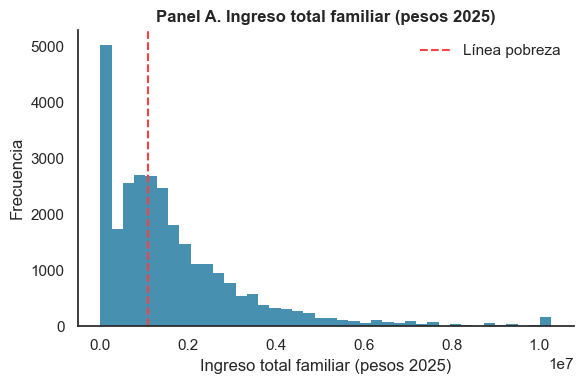

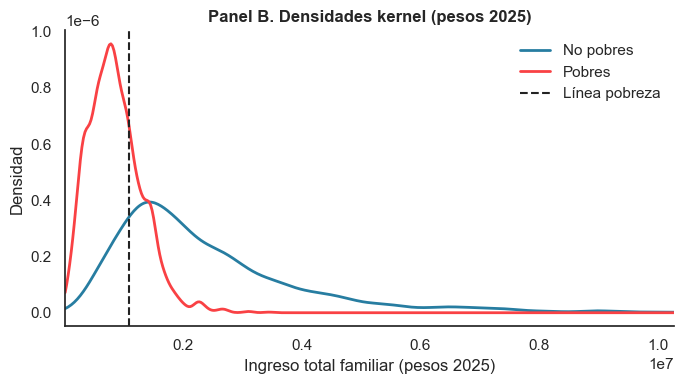

In [34]:
# ------------------------------------------------------------
# 3) Ingreso total familiar ajustado a pesos 2025 - Gráficos
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# === HEADER ESTRICTO (requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df  # creado en el bloque inicial (carga + AE + CBT + pobre)
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df` y `pobre`.")

if "pobre" not in df.columns:
    raise RuntimeError("Falta `pobre`. Ejecutá el bloque de AE+CBT+`pobre` antes de continuar.")
df["pobre"] = df["pobre"].astype(int)
#---------------------------------------------------------------------

sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

# ---------- A. Preparación y chequeos ----------
df["anio"] = pd.to_numeric(df["anio"], errors="coerce")
df["itf"]  = pd.to_numeric(df["itf"],  errors="coerce")

if "ad_equiv_hogar" not in df.columns:
    raise KeyError("Falta 'ad_equiv_hogar'. Ejecutá antes el bloque de AE.")
df["ad_equiv_hogar"] = pd.to_numeric(df["ad_equiv_hogar"], errors="coerce")

# CBT por año (nominal)
cbt_map = {2005: 205.07, 2025: 365_177.0}
df["cbt_ae"] = df["anio"].map(cbt_map).astype(float)

# ---------- B. ITF a pesos 2025 ----------
factor = 365_177 / 205.07  # 2025/2005
df["itf_2025"] = np.where(df["anio"] == 2005, df["itf"] * factor, df["itf"])

# ---------- C. Umbral de pobreza por hogar y condición ----------
df["ingreso_necesario"] = df["ad_equiv_hogar"] * df["cbt_ae"]
# 'pobre' ya fue definida antes como binaria 0/1; no la redefinimos aquí
if "pobre" not in df.columns:
    df["pobre"] = (df["itf"] < df["ingreso_necesario"]).astype(int)
else:
    df["pobre"] = df["pobre"].astype(int)

# ---------- D. Línea vertical en pesos 2025 (mediana ponderada si hay 'pondera') ----------
thr_2025 = df["ingreso_necesario"] * np.where(df["anio"] == 2005, factor, 1.0)

def weighted_median(x, w):
    x = np.asarray(x, float)
    w = np.asarray(w, float)
    order = np.argsort(x)
    x_sorted = x[order]
    w_sorted = w[order]
    cw = np.cumsum(w_sorted)
    cutoff = 0.5 * w_sorted.sum()
    return x_sorted[np.searchsorted(cw, cutoff)]

if "pondera" in df.columns and df["pondera"].notna().any():
    w = df["pondera"].clip(lower=0).fillna(0)
    lp_val = weighted_median(thr_2025.fillna(0), w)
else:
    lp_val = np.nanmedian(thr_2025)

# ---------- E. Panel A — Histograma (pesos 2025) ----------
hi = df["itf_2025"].quantile(0.995)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(
    df["itf_2025"].clip(0, hi).dropna(), bins=40,
    color=palette_tp1[0], alpha=0.85, edgecolor="none"
)
if np.isfinite(lp_val):
    ax.axvline(lp_val, color=palette_tp1[2], linestyle="--", label="Línea pobreza")
ax.set_title("Panel A. Ingreso total familiar (pesos 2025)", fontsize=12, weight="bold")
ax.set_xlabel("Ingreso total familiar (pesos 2025)")
ax.set_ylabel("Frecuencia")
ax.legend(frameon=False)
sns.despine(ax=ax); ax.set_facecolor("white")
plt.tight_layout(); plt.show()

# ---------- F. Panel B — Densidades (pesos 2025, escala lineal) ----------
cols = ["itf_2025", "pobre"] + (["pondera"] if "pondera" in df.columns else [])
d = df.loc[df["itf_2025"].between(1, hi), cols].dropna().copy()
d = d[(d["pobre"] == 0) | (d["pobre"] == 1)]

g0 = d.loc[d["pobre"] == 0, "itf_2025"].to_numpy(float)
g1 = d.loc[d["pobre"] == 1, "itf_2025"].to_numpy(float)

# Robustez: evitar KDE si no hay variación suficiente
ok0 = (len(g0) > 20) and (np.ptp(g0) > 0)
ok1 = (len(g1) > 20) and (np.ptp(g1) > 0)

if ok0 and ok1:
    grid = np.linspace(d["itf_2025"].min(), hi, 400)

    w0 = d.loc[d["pobre"] == 0, "pondera"].clip(lower=0).to_numpy(float) if "pondera" in d.columns else None
    w1 = d.loc[d["pobre"] == 1, "pondera"].clip(lower=0).to_numpy(float) if "pondera" in d.columns else None

    k0 = gaussian_kde(g0, weights=w0)
    k1 = gaussian_kde(g1, weights=w1)

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(grid, k0(grid), label="No pobres", color=palette_tp1[0], lw=2)
    ax.plot(grid, k1(grid), label="Pobres",     color=palette_tp1[2], lw=2)
    if np.isfinite(lp_val):
        ax.axvline(lp_val, color="#222222", ls="--", label="Línea pobreza")
    ax.set_xlim(d["itf_2025"].min(), hi)
    ax.set_title("Panel B. Densidades kernel (pesos 2025)", fontsize=12, weight="bold")
    ax.set_xlabel("Ingreso total familiar (pesos 2025)")
    ax.set_ylabel("Densidad")
    ax.legend(frameon=False)
    sns.despine(ax=ax); ax.set_facecolor("white")
    plt.tight_layout(); plt.show()
else:
    print("Densidades no graficadas: pocos datos o variación insuficiente.")


## Ejercicio 4. Creación variable horastrab - Jefe del hogar

In [35]:
# ------------------------------------------------------------
# 4) Total de horas trabajadas - Jefe/a de hogar
# ------------------------------------------------------------
import numpy as np
import pandas as pd

# === HEADER BASE (no requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df`.")
#--------------------------------------------------------------

# --- Chequeos mínimos
req = ["ch03", "pp3e_tot", "pp3f_tot", "anio"]
faltan = [c for c in req if c not in df.columns]
if faltan:
    raise KeyError(f"Faltan columnas requeridas: {faltan}")

# --- Asegurar numéricos
for c in ["ch03", "pp3e_tot", "pp3f_tot", "anio"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- Total horas (ocupación principal + otras)
df["horastrab"] = df["pp3e_tot"].fillna(0) + df["pp3f_tot"].fillna(0)

# Rango razonable semanal [0, 112]; fuera -> NA
df.loc[(df["horastrab"] < 0) | (df["horastrab"] > 112), "horastrab"] = np.nan

# Si existe 'estado', solo ocupados (=1) mantienen horas; resto -> NA
if "estado" in df.columns:
    df["estado"] = pd.to_numeric(df["estado"], errors="coerce")
    df.loc[df["estado"] != 1, "horastrab"] = np.nan

# --- Filtrar jefes/as de hogar
cols = ["anio", "horastrab"] + (["pondera"] if "pondera" in df.columns else [])
jefes = df.loc[df["ch03"] == 1, cols].copy()

# --- Estadísticas NO ponderadas
desc_np = jefes["horastrab"].describe(percentiles=[.5])[["mean", "std", "min", "50%", "max"]].round(2)
print("Estadísticas (NO ponderadas) — jefes/as de hogar, horastrab:")
print(desc_np, "\n")

print("Por año (NO ponderado):")
print(
    jefes.groupby("anio", dropna=False)["horastrab"]
         .agg(mean="mean", std="std", min="min", p50="median", max="max")
         .round(2)
)

# --- Funciones auxiliares ponderadas
def wmean(x, w):
    return np.average(x, weights=w) if len(x) else np.nan

def wstd(x, w):
    if len(x) == 0:
        return np.nan
    m = np.average(x, weights=w)
    v = np.average((x - m)**2, weights=w)
    return np.sqrt(v)

def wmedian(x, w):
    if len(x) == 0:
        return np.nan
    order = np.argsort(x)
    xs = x[order]
    ws = w[order]
    cw = ws.cumsum()
    return xs[np.searchsorted(cw, ws.sum() * 0.5)]

# --- Estadísticas PONDERADAS (si hay 'pondera')
if "pondera" in jefes.columns and jefes["pondera"].notna().any():
    d = jefes.dropna(subset=["horastrab"]).copy()
    d["w"] = pd.to_numeric(d["pondera"], errors="coerce").clip(lower=0).astype(float)

    x = d["horastrab"].to_numpy(dtype=float)
    w = d["w"].to_numpy(dtype=float)

    overall_w = {
        "mean_w": float(round(wmean(x, w), 2)),
        "std_w":  float(round(wstd(x, w), 2)),
        "min":    float(round(np.nanmin(x), 2)) if len(x) else np.nan,
        "p50_w":  float(round(wmedian(x, w), 2)),
        "max":    float(round(np.nanmax(x), 2)) if len(x) else np.nan,
        "n":      int(len(x))
    }
    print("\nEstadísticas (PONDERADAS) — jefes/as de hogar, horastrab:")
    print(overall_w)

    def by_year(g):
        gx = g["horastrab"].to_numpy(dtype=float)
        gw = g["w"].to_numpy(dtype=float)
        return pd.Series({
            "mean_w": float(round(wmean(gx, gw), 2)),
            "std_w":  float(round(wstd(gx,  gw), 2)),
            "min":    float(round(np.nanmin(gx), 2)) if len(gx) else np.nan,
            "p50_w":  float(round(wmedian(gx, gw), 2)),
            "max":    float(round(np.nanmax(gx), 2)) if len(gx) else np.nan,
            "n":      int(len(gx))
        })

    print("\nPor año (PONDERADO):")
    # Evita DeprecationWarning seleccionando columnas explícitas
    print(
        d.groupby("anio", dropna=False)[["horastrab", "w"]]
         .apply(by_year)
    )
else:
    print("\n(No hay 'pondera' disponible: se omiten estadísticas ponderadas.)")



Estadísticas (NO ponderadas) — jefes/as de hogar, horastrab:
mean     38.77
std      20.99
min       0.00
50%      40.00
max     112.00
Name: horastrab, dtype: float64 

Por año (NO ponderado):
       mean    std  min   p50    max
anio                                
2005  41.69  22.42  0.0  44.0  112.0
2025  36.01  19.14  0.0  40.0  112.0

Estadísticas (PONDERADAS) — jefes/as de hogar, horastrab:
{'mean_w': 38.0, 'std_w': 20.72, 'min': 0.0, 'p50_w': 40.0, 'max': 112.0, 'n': 6084}

Por año (PONDERADO):
      mean_w  std_w  min  p50_w    max       n
anio                                          
2005   41.59  22.35  0.0   44.0  112.0  2959.0
2025   35.43  19.07  0.0   40.0  112.0  3125.0


## Ejercicio 5. Tamaño de la base de datos

In [36]:
# ------------------------------------------------------------
# 5) Resumen base final para Región Pampeana
#     (conteos, tasas no ponderadas y ponderadas)
# ------------------------------------------------------------
import numpy as np
import pandas as pd

# === HEADER ESTRICTO (requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df  # creado en el bloque inicial (carga + AE + CBT + pobre)
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df` y `pobre`.")

if "pobre" not in df.columns:
    raise RuntimeError("Falta `pobre`. Ejecutá el bloque de AE+CBT+`pobre` antes de continuar.")
df["pobre"] = df["pobre"].astype(int)
#--------------------------------------------------------------------


# --- Chequeos/normalizaciones mínimas
if "anio" not in df.columns:
    raise KeyError("Falta 'anio' en df.")
df["anio"] = pd.to_numeric(df["anio"], errors="coerce")

# --- Verificar / recrear variable de pobreza si fuera necesario ---
if "pobre" not in df.columns:
    req = ["itf", "ad_equiv_hogar"]
    faltan = [c for c in req if c not in df.columns]
    if faltan:
        raise KeyError(f"Faltan columnas para definir 'pobre': {faltan}")

    cbt_map = {2005: 205.07, 2025: 365_177.0}
    df["cbt_ae"] = df["anio"].map(cbt_map).astype(float)
    df["itf"] = pd.to_numeric(df["itf"], errors="coerce")
    df["ad_equiv_hogar"] = pd.to_numeric(df["ad_equiv_hogar"], errors="coerce")
    df["ingreso_necesario"] = df["ad_equiv_hogar"] * df["cbt_ae"]
    df["pobre"] = (df["itf"] < df["ingreso_necesario"]).astype(int)
else:
    df["pobre"] = df["pobre"].astype(int)

# --- Tabla resumen (NO ponderado) ---
valid = df["pobre"].notna()
gb = df.groupby("anio", dropna=False)

tabla_np = gb.agg(
    obs=("anio", "size"),
    na_pobre=("pobre", lambda x: x.isna().sum()),
    pobres=("pobre", lambda x: (x == 1).sum()),
    no_pobres=("pobre", lambda x: (x == 0).sum())
).assign(
    tasa_no_pond_pct=lambda d: (d["pobres"] / (d["pobres"] + d["no_pobres"]).replace(0, np.nan) * 100).round(1),
    total_vars=df.shape[1]
)

# --- Tabla ponderada (si existe 'pondera') ---
if "pondera" in df.columns and df["pondera"].notna().any():
    d_w = df.loc[valid, ["anio", "pobre", "pondera"]].copy()
    d_w["pondera"] = pd.to_numeric(d_w["pondera"], errors="coerce").clip(lower=0).astype(float)

    w_by_year = (
        d_w.assign(w_pobre=lambda x: x["pondera"] * x["pobre"])
           .groupby("anio", dropna=False)
           .agg(peso_total=("pondera", "sum"), peso_pobres=("w_pobre", "sum"))
           .assign(tasa_pond_pct=lambda t: (t["peso_pobres"] / t["peso_total"] * 100).round(1))
    )
    tabla = tabla_np.join(w_by_year[["tasa_pond_pct"]], how="left")
else:
    tabla = tabla_np.copy()
    tabla["tasa_pond_pct"] = np.nan

# --- Renombrado a etiquetas finales ---
colmap = {
    "obs": "Cantidad de observaciones",
    "na_pobre": "Observaciones con NA en 'pobre'",
    "pobres": "Cantidad de pobres",
    "no_pobres": "Cantidad de no pobres",
    "total_vars": "Variables limpias y homogeneizadas",
    "tasa_no_pond_pct": "Tasa de pobreza (no ponderada, %)",
    "tasa_pond_pct": "Tasa de pobreza (ponderada, %)"
}
tabla_final = tabla.rename(columns=colmap)
tabla_final.index.name = "Año"

# --- Fila total (usar las MISMAS etiquetas que en 'tabla_final') ---
tot_obs = int(len(df))
tot_na  = int(df["pobre"].isna().sum())
tot_pob = int((df["pobre"] == 1).sum())
tot_npb = int((df["pobre"] == 0).sum())
tot_np_rate = round(tot_pob / (tot_pob + tot_npb) * 100, 1) if (tot_pob + tot_npb) > 0 else np.nan

# tasa ponderada total (si hay 'pondera')
tasa_pond_total = np.nan
if "pondera" in df.columns and df["pondera"].notna().any():
    d_tot = df.loc[valid, ["pobre", "pondera"]].copy()
    d_tot["pondera"] = pd.to_numeric(d_tot["pondera"], errors="coerce").clip(lower=0).astype(float)
    w_tot = d_tot["pondera"].sum()
    w_pov = (d_tot["pondera"] * d_tot["pobre"]).sum()
    tasa_pond_total = round(w_pov / w_tot * 100, 1) if w_tot > 0 else np.nan

tabla_total = pd.DataFrame({
    "Cantidad de observaciones": [tot_obs],
    "Observaciones con NA en 'pobre'": [tot_na],
    "Cantidad de pobres": [tot_pob],
    "Cantidad de no pobres": [tot_npb],
    "Variables limpias y homogeneizadas": [df.shape[1]],
    "Tasa de pobreza (no ponderada, %)": [tot_np_rate],
    "Tasa de pobreza (ponderada, %)": [tasa_pond_total]
}, index=["Total"])

# --- Ensamblar y chequeo de consistencia ---
tabla_final = pd.concat([tabla_final, tabla_total], axis=0)

# (Opcional) Chequeo: pobres + no_pobres + NA == observaciones
chk = (
    tabla_final[["Cantidad de pobres","Cantidad de no pobres","Observaciones con NA en 'pobre'","Cantidad de observaciones"]]
    .assign(suma=lambda d: d["Cantidad de pobres"]+d["Cantidad de no pobres"]+d["Observaciones con NA en 'pobre'"])
)
assert np.allclose(chk["suma"], chk["Cantidad de observaciones"], equal_nan=True), "Las sumas por fila no cierran."

print("\nTabla 1. Resumen de la base final (Región Pampeana):\n")
try:
    from IPython.display import display
    display(tabla_final)
except Exception:
    print(tabla_final)




Tabla 1. Resumen de la base final (Región Pampeana):



,Cantidad de observaciones,Observaciones con NA en 'pobre',Cantidad de pobres,Cantidad de no pobres,"Tasa de pobreza (no ponderada, %)",Variables limpias y homogeneizadas,"Tasa de pobreza (ponderada, %)"
2005,14651,0,4364,10287,29.8,42,28.5
2025,13803,0,7733,6070,56.0,42,56.0
Total,28454,0,12097,16357,42.5,42,43.6


# Parte II: Métodos no supervisados

In [24]:
# ------------------------------------------------------------
# PREPARACIÓN
# ------------------------------------------------------------

# ------------------------------------------------------------
# Instalar K Modes
# ------------------------------------------------------------
# !pip install kmodes


## Ejercicio 1. Matriz de correlaciones

Matriz de correlaciones (tabla):


,edad,edad2,educ,itf,miembros_hogar,horastrab
edad,1.00,0.98,-0.10,0.04,-0.21,-0.03
edad2,0.98,1.00,-0.12,0.03,-0.21,-0.05
educ,-0.10,-0.12,1.00,0.20,-0.21,-0.02
itf,0.04,0.03,0.20,1.00,-0.06,-0.01
miembros_hogar,-0.21,-0.21,-0.21,-0.06,1.00,0.01
horastrab,-0.03,-0.05,-0.02,-0.01,0.01,1.00


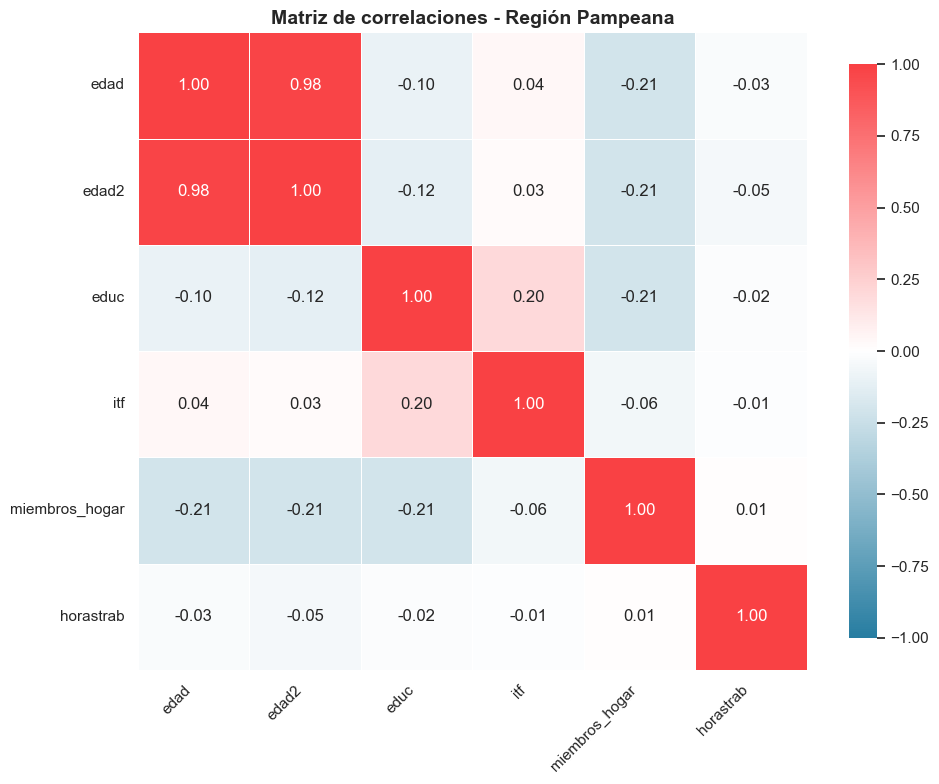

In [37]:
# ------------------------------------------------------------
# 1) Matriz de correlaciones (sin duplicados en edad/horastrab)
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

# ---------- 1) Usar df en memoria; cargar solo si no existe ----------
try:
    df
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# ---------- 2) Renombrados mínimos (evitar duplicados) ----------
ren = {"itf": "itf", "miembros_hogar": "miembros_hogar"}
if "edad" not in df.columns and "ch06" in df.columns:
    ren["ch06"] = "edad"
if "educ" not in df.columns and "nivel_ed" in df.columns:
    ren["nivel_ed"] = "educ"
if "horastrab" not in df.columns and "pp3e_tot" in df.columns:
    ren["pp3e_tot"] = "horastrab"

df_corr = df.rename(columns=ren).copy()

# Crear 'horastrab' desde pp3e_tot+pp3f_tot si aún falta
if "horastrab" not in df_corr.columns and {"pp3e_tot","pp3f_tot"}.issubset(df_corr.columns):
    df_corr["horastrab"] = (
        pd.to_numeric(df_corr["pp3e_tot"], errors="coerce").fillna(0) +
        pd.to_numeric(df_corr["pp3f_tot"], errors="coerce").fillna(0)
    )

# ---------- 3) Asegurar UNA sola 'edad' numérica ----------
if (df_corr.columns == "edad").sum() > 1:
    tmp = df_corr.loc[:, df_corr.columns == "edad"]
    df_corr["edad"] = pd.to_numeric(tmp.bfill(axis=1).iloc[:, 0], errors="coerce")
    df_corr = df_corr.loc[:, ~((df_corr.columns == "edad") & df_corr.columns.duplicated(keep="first"))]
else:
    if "edad" in df_corr.columns:
        df_corr["edad"] = pd.to_numeric(df_corr["edad"], errors="coerce")
    elif "ch06" in df_corr.columns:
        df_corr["edad"] = pd.to_numeric(df_corr["ch06"], errors="coerce")
    else:
        raise ValueError("No se encontró 'edad' ni 'ch06' para derivarla.")

# Derivar edad²
df_corr["edad2"] = df_corr["edad"]**2

# ---------- 4) Selección y limpieza para correlación ----------
vars_corr = ["edad", "edad2", "educ", "itf", "miembros_hogar", "horastrab"]
presentes = [v for v in vars_corr if v in df_corr.columns]
if len(presentes) < 2:
    raise ValueError(f"No hay suficientes variables para correlación. Presentes: {presentes}")

df_corr_sub = df_corr[presentes].apply(pd.to_numeric, errors="coerce").dropna()
# eliminar columnas duplicadas por nombre (por si acaso)
df_corr_sub = df_corr_sub.loc[:, ~df_corr_sub.columns.duplicated(keep="first")]

# ---------- 5) Matriz de correlaciones ----------
corr_matrix = df_corr_sub.corr().round(2)
print("Matriz de correlaciones (tabla):")
display(corr_matrix)

# ---------- 6) Heatmap con estilo TP1 ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]
cmap_tp1 = LinearSegmentedColormap.from_list("tp1_div", [palette_tp1[0], "white", palette_tp1[2]], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap=cmap_tp1,
    vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": 0.9}
)
ax.set_title("Matriz de correlaciones - Región Pampeana", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




## Ejercicio 2. PCA con ingresos

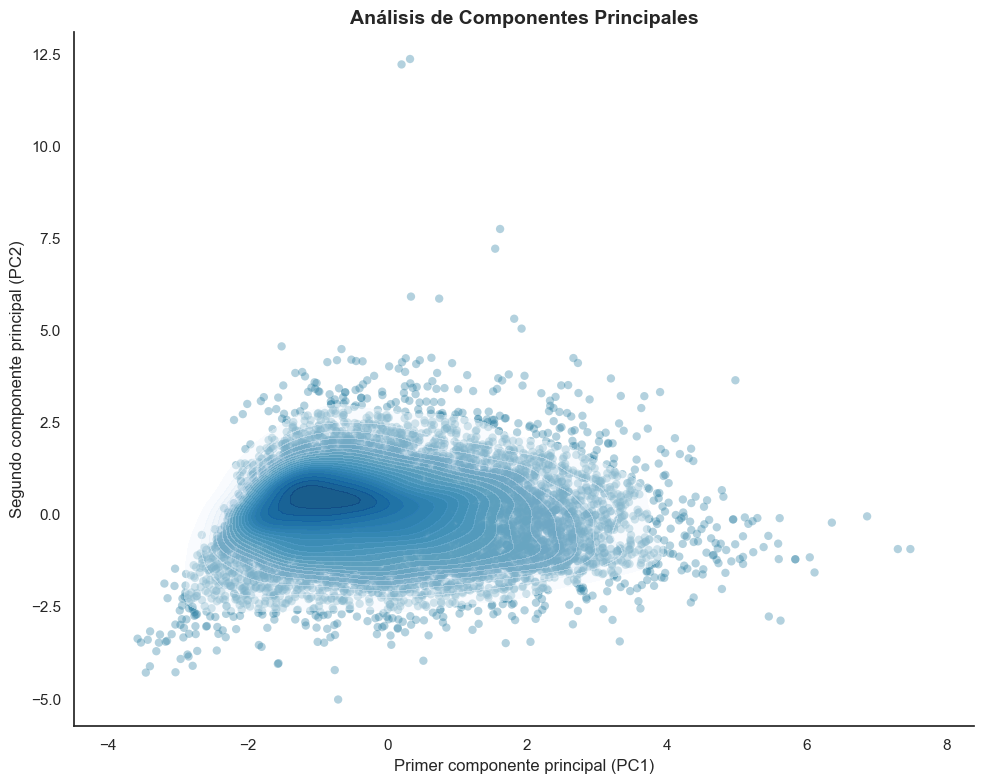

Proporción de varianza explicada por componente:
  PC1: 0.346
  PC2: 0.220
  PC3: 0.166
  PC4: 0.153
  PC5: 0.112
  PC6: 0.003
Varianza acumulada (PC1+PC2): 0.566


In [38]:
# ------------------------------------------------------------
# 2) PCA con ingresos
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap

# ---------- 1) Cargar base y seleccionar variables ----------
try:
    df  # si ya está en memoria, úsalo
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# Renombrar solo si hace falta (no pisar columnas ya creadas)
ren = {
    "itf": "itf",
    "miembros_hogar": "miembros_hogar",
}
if "edad" not in df.columns and "ch06" in df.columns:
    ren["ch06"] = "edad"
if "educ" not in df.columns and "nivel_ed" in df.columns:
    ren["nivel_ed"] = "educ"
#  SOLO mapear pp3e_tot→horastrab si NO existe horastrab
if "horastrab" not in df.columns and "pp3e_tot" in df.columns:
    ren["pp3e_tot"] = "horastrab"

df_pca = df.rename(columns=ren).copy()

# --- Asegurar UNA sola 'horastrab' ---
if (df_pca.columns == "horastrab").sum() > 1:
    tmp = df_pca.loc[:, df_pca.columns == "horastrab"]
    df_pca["horastrab"] = pd.to_numeric(tmp.bfill(axis=1).iloc[:, 0], errors="coerce")
    df_pca = df_pca.loc[:, ~((df_pca.columns == "horastrab") & df_pca.columns.duplicated(keep="first"))]
elif "horastrab" not in df_pca.columns and {"pp3e_tot","pp3f_tot"}.issubset(df.columns):
    df_pca["horastrab"] = (
        pd.to_numeric(df["pp3e_tot"], errors="coerce").fillna(0) +
        pd.to_numeric(df["pp3f_tot"], errors="coerce").fillna(0)
    )

# --- Asegurar UNA sola 'edad' ---
if (df_pca.columns == "edad").sum() > 1:
    tmp = df_pca.loc[:, df_pca.columns == "edad"]
    df_pca["edad"] = pd.to_numeric(tmp.bfill(axis=1).iloc[:, 0], errors="coerce")
    df_pca = df_pca.loc[:, ~((df_pca.columns == "edad") & df_pca.columns.duplicated(keep="first"))]
else:
    if "edad" in df_pca.columns:
        df_pca["edad"] = pd.to_numeric(df_pca["edad"], errors="coerce")
    elif "ch06" in df_pca.columns:
        df_pca["edad"] = pd.to_numeric(df_pca["ch06"], errors="coerce")
    else:
        raise ValueError("No se encontró 'edad' ni 'ch06' para derivarla.")

# Derivar edad^2
df_pca["edad2"] = df_pca["edad"] ** 2

# Variables para PCA
vars_pca = ["edad", "edad2", "educ", "itf", "miembros_hogar", "horastrab"]
presentes = [v for v in vars_pca if v in df_pca.columns]
if not set(["edad","edad2","itf","miembros_hogar","horastrab"]).issubset(presentes):
    raise ValueError(f"Faltan variables para PCA. Presentes: {presentes}")

# Numéricas y sin NA
df_pca = df_pca[presentes].apply(pd.to_numeric, errors="coerce").dropna()

#  Guardar los nombres EXACTOS usados por el PCA (sin duplicados)
feature_names_pca = df_pca.columns.tolist()

# ---------- 2) Estandarizar ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# ---------- 3) PCA ----------
pca = PCA(n_components=len(feature_names_pca))
X_pca = pca.fit_transform(X_scaled)
# ---------- 3bis) Construir 'scores' (PC1/PC2) ----------
if X_pca.shape[1] < 2:
    raise ValueError("El PCA devolvió menos de 2 componentes; no se puede graficar PC1 vs PC2.")

scores = pd.DataFrame(
    X_pca[:, :2],
    columns=["PC1", "PC2"],
    index=df_pca.index
)


# ---------- 4) Gráfico de dispersión PC1 vs PC2 ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor("white")
import seaborn as sns
sns.despine(ax=ax)  # saca marcos superior y derecho
plt.scatter(
    scores["PC1"],
    scores["PC2"],
    alpha=0.35,
    s=36,
    color=palette_tp1[0],
    edgecolor="none"
)

# Densidad suavizada (ayuda a ver la concentración de observaciones)
sns.kdeplot(
    x=scores["PC1"],
    y=scores["PC2"],
    fill=True,
    cmap="Blues",
    levels=20,       # menos contornos 
    alpha=0.45,      # un poco más tenue
)

#Títulos y formato
plt.title("Análisis de Componentes Principales", fontsize=14, weight="bold")
plt.xlabel("Primer componente principal (PC1)")
plt.ylabel("Segundo componente principal (PC2)")
plt.tight_layout()
plt.show()

# ---------- 5) Imprimir varianza explicada ----------
var_exp = pca.explained_variance_ratio_
print("Proporción de varianza explicada por componente:")
for i, v in enumerate(var_exp, 1):
    print(f"  PC{i}: {v:.3f}")
print(f"Varianza acumulada (PC1+PC2): {var_exp[0]+var_exp[1]:.3f}")


## Ejercicio 3. Ponderadores de los componentes

Ponderadores (loadings) de las variables en los dos primeros componentes:


,PC1,PC2
edad,0.680,-0.053
edad2,0.681,-0.067
educ,-0.089,0.693
itf,0.039,0.524
miembros_hogar,-0.247,-0.483
horastrab,-0.051,-0.062


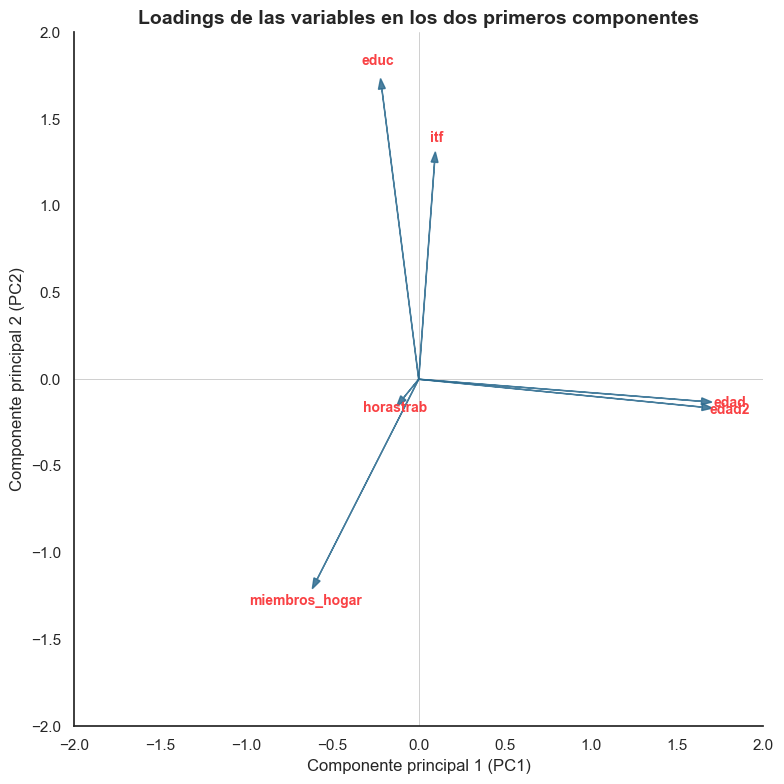

In [39]:
# ------------------------------------------------------------
# 3) Ponderadores (loadings) de los componentes
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Header base
try:
    df
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df`.")

# Guards
if "pca" not in globals():
    raise RuntimeError("Falta el objeto 'pca'. Ejecutá el bloque de PCA antes de este.")

# Nombres de features EXACTOS del PCA
if "feature_names_pca" in globals():
    idx_vars = feature_names_pca
elif "df_pca" in globals():
    idx_vars = list(df_pca.columns)
else:
    raise RuntimeError("No encuentro los nombres de variables del PCA (feature_names_pca / df_pca).")

# Validación de dimensiones
n_features = pca.components_.shape[1]
if len(idx_vars) != n_features:
    raise ValueError(f"El PCA tiene {n_features} features pero el índice aporta {len(idx_vars)}. "
                     f"Revisá duplicados (p.ej., 'horastrab').")

# Loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=idx_vars
)

print("Ponderadores (loadings) de las variables en los dos primeros componentes:")
display(loadings.iloc[:, :2].round(3))

# --- Biplot simplificado (PC1 vs PC2) ---
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_facecolor("white")
sns.despine(ax=ax)
ax.axhline(0, color="#C7C7C7", linewidth=0.6, zorder=0)
ax.axvline(0, color="#C7C7C7", linewidth=0.6, zorder=0)

scale = 2.5
for var in idx_vars:
    dx = float(loadings.loc[var, "PC1"])
    dy = float(loadings.loc[var, "PC2"])
    plt.arrow(0, 0, dx*scale, dy*scale,
              color="#2C6B8F", alpha=0.85,
              head_width=0.04, head_length=0.06,
              length_includes_head=True)
    plt.text(dx*(scale+0.15), dy*(scale+0.15), var,
             color="#F94144", ha='center', va='center',
             fontsize=10, weight='bold')

plt.title("Loadings de las variables en los dos primeros componentes", fontsize=14, weight='bold')
plt.xlabel("Componente principal 1 (PC1)")
plt.ylabel("Componente principal 2 (PC2)")
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-2.0, 2.0)
plt.tight_layout()
plt.show()



## Ejercicio 4. Varianza explicada por componentes - Gráficos

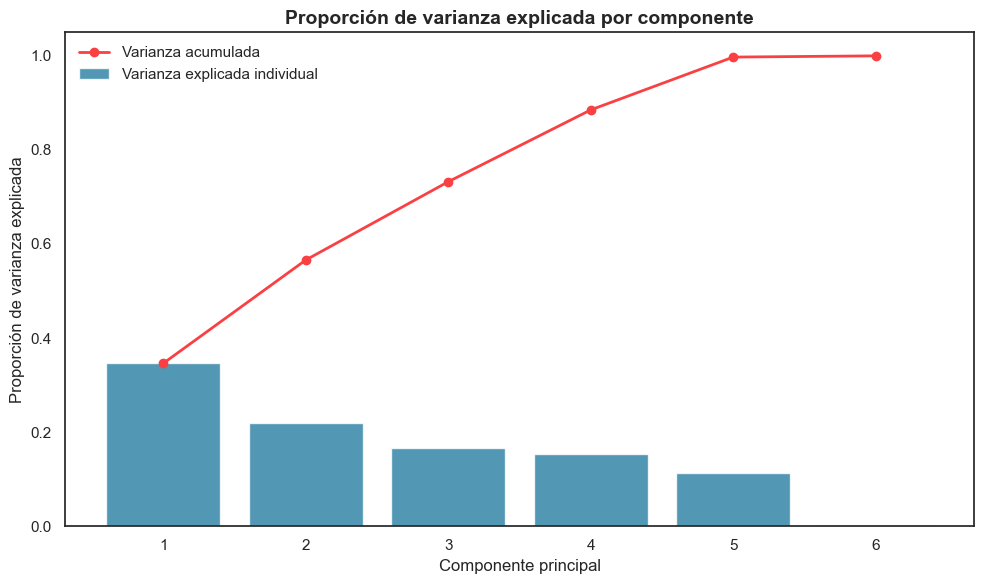

Varianza explicada por componente:
  PC1: 0.346
  PC2: 0.220
  PC3: 0.166
  PC4: 0.153
  PC5: 0.112
  PC6: 0.003
Varianza acumulada total: 1.000


In [40]:
# ------------------------------------------------------------
# 4) Varianza explicada por componente y gráficos
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === HEADER BASE (no requiere `pobre`) ===
import pandas as pd, numpy as np

try:
    df
except NameError:
    raise RuntimeError("Ejecutá antes el bloque inicial que crea `df`.")
#---------------------------------------------------------------

# Estilo TP1
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

# ---------- 1) Obtener varianza explicada ----------
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# ---------- 2) Gráfico de barras + línea acumulada ----------
plt.figure(figsize=(10, 6))

# Barras individuales
bars = plt.bar(
    range(1, len(var_exp)+1),
    var_exp,
    color=palette_tp1[0],
    alpha=0.8,
    label="Varianza explicada individual"
)

# Línea acumulada
plt.plot(
    range(1, len(var_exp)+1),
    cum_var_exp,
    color=palette_tp1[2],
    marker="o",
    linewidth=2,
    label="Varianza acumulada"
)

# Detalles del gráfico
plt.title("Proporción de varianza explicada por componente", fontsize=14, weight="bold")
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza explicada")
plt.xticks(range(1, len(var_exp)+1))
plt.ylim(0, 1.05)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# ---------- 3) Mostrar tabla numérica ----------
print("Varianza explicada por componente:")
for i, v in enumerate(var_exp, 1):
    print(f"  PC{i}: {v:.3f}")
print(f"Varianza acumulada total: {cum_var_exp[-1]:.3f}")


## Ejercicio 5. Cluster K - medias

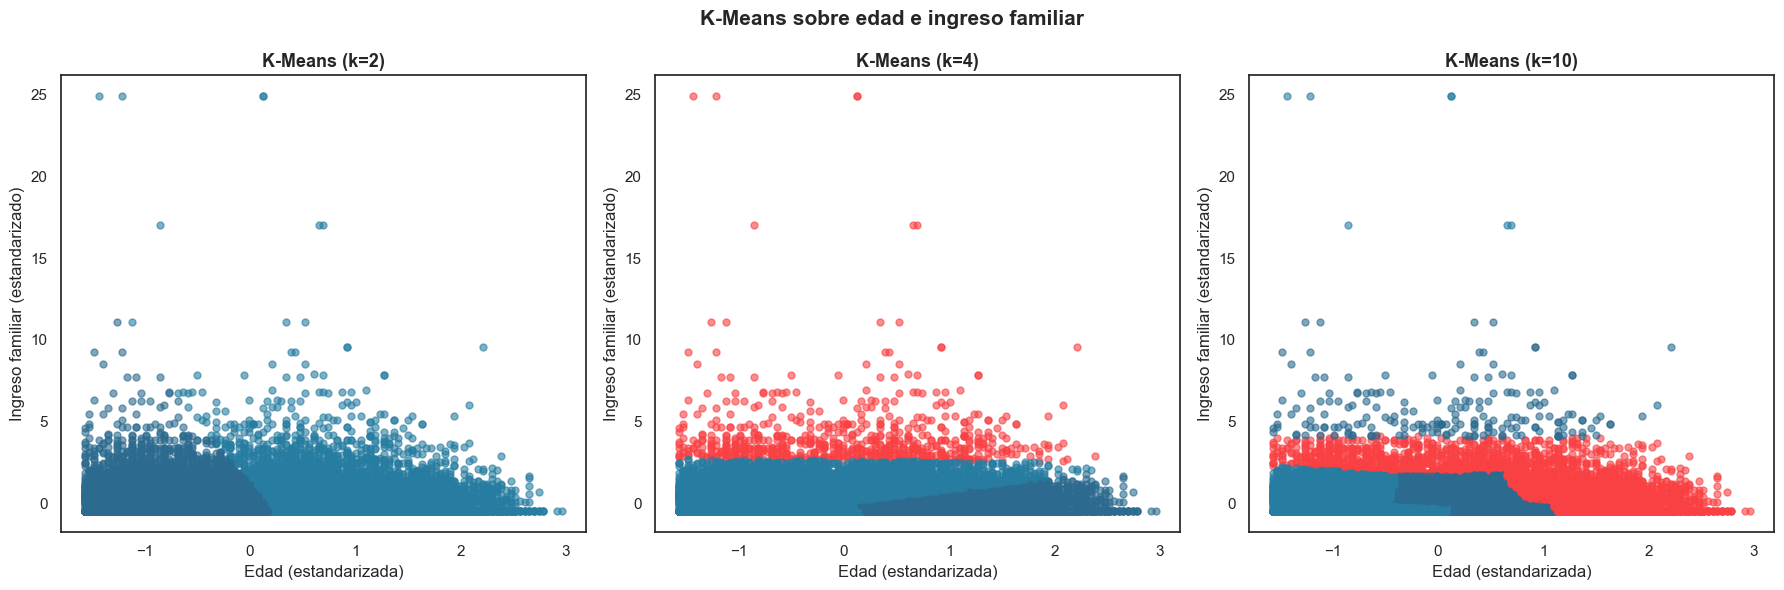

In [41]:
# ------------------------------------------------------------
# 5.1) Cluster K-medias - Algoritmo (compat + robusto)
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ==== Parámetro opcional ====
USE_LOG_ITF = False   # poné True si querés romper colas con log1p

# ---------- 1) Base ----------
try:
    df
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# ---------- 2) Asegurar columnas y tipos (sin duplicados) ----------
# edad
if "edad" not in df.columns and "ch06" in df.columns:
    df = df.rename(columns={"ch06": "edad"})
if (df.columns == "edad").sum() > 1:
    tmp = df.loc[:, df.columns == "edad"]
    df["edad"] = pd.to_numeric(tmp.bfill(axis=1).iloc[:, 0], errors="coerce")
    df = df.loc[:, ~((df.columns == "edad") & df.columns.duplicated(keep="first"))]
else:
    df["edad"] = pd.to_numeric(df["edad"], errors="coerce")

# itf numérica
df["itf"] = pd.to_numeric(df["itf"], errors="coerce")

# ---------- 3) Subconjunto (consistente con original) ----------
df_km = df[["edad", "itf"]].dropna().copy()

# Opción: transformar itf (sin cambiar el look por defecto)
if USE_LOG_ITF:
    # Winsorizar leve para estabilidad (1–99%)
    q1, q99 = df_km["itf"].quantile([0.01, 0.99])
    itf_w = df_km["itf"].clip(q1, q99)
    df_km["itf"] = np.log1p(itf_w)

# ---------- 4) Estandarizar ----------
X_scaled = StandardScaler().fit_transform(df_km)

# ---------- 5) K-means para k = 2, 4, 10 ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, k in zip(axes, [2, 4, 10]):
    km = KMeans(n_clusters=k, n_init=20, random_state=133660)
    cl = km.fit_predict(X_scaled)

    colors = palette_tp1 * (k // len(palette_tp1) + 1)
    for i in range(k):
        ax.scatter(X_scaled[cl == i, 0], X_scaled[cl == i, 1],
                   s=25, alpha=0.6, color=colors[i])

    ax.set_title(f"K-Means (k={k})", fontsize=13, weight="bold")
    ax.set_xlabel("Edad (estandarizada)")
    ax.set_ylabel(("Log ingreso familiar" if USE_LOG_ITF else "Ingreso familiar") + " (estandarizado)")

plt.suptitle("K-Means sobre edad e ingreso familiar" + (" (log, winsorizado)" if USE_LOG_ITF else ""), 
             fontsize=15, weight="bold")
plt.tight_layout()
plt.show()



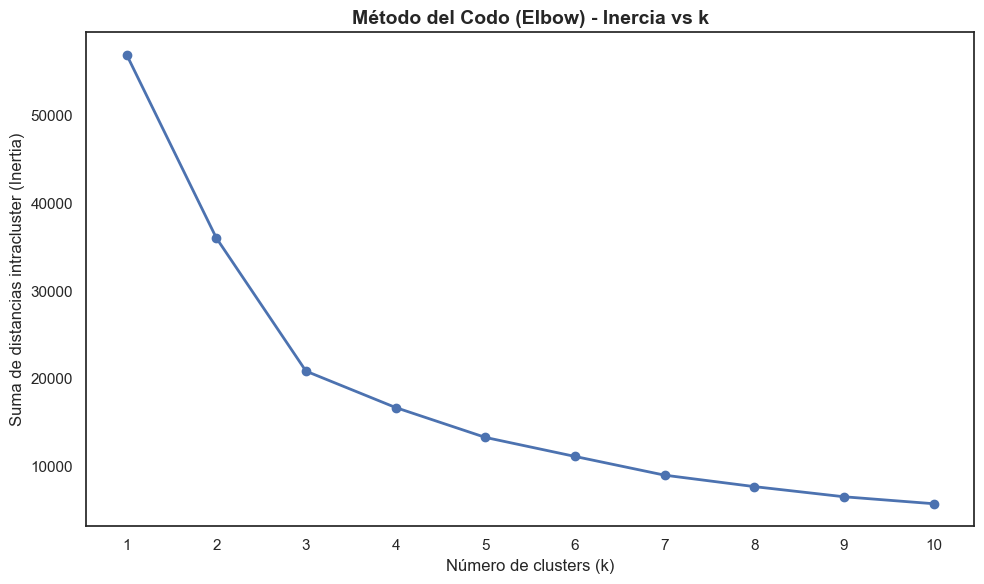

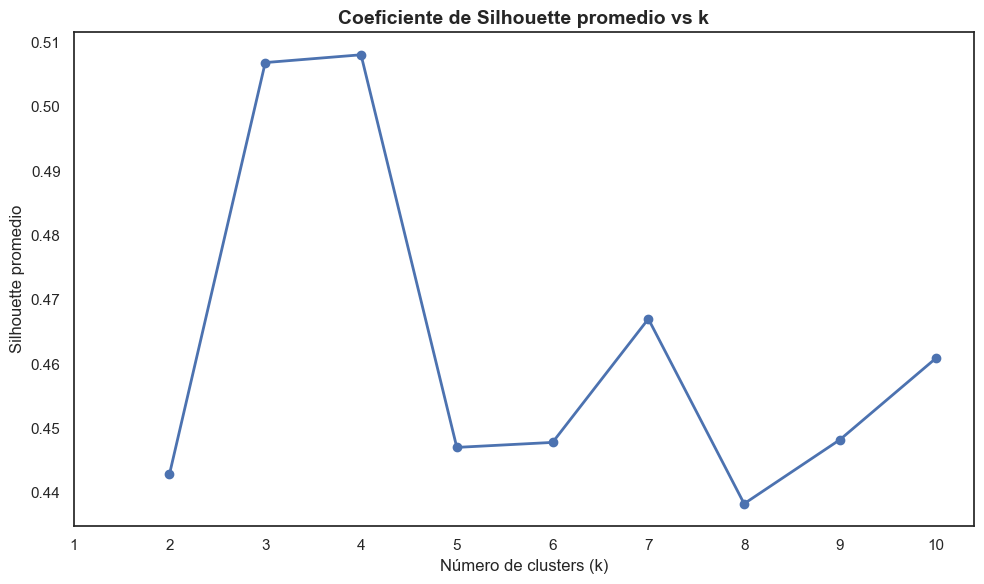


Resumen Elbow + Silhouette
    k     inertia  silhouette
0   1  56908.0000         NaN
1   2  36052.4142      0.4429
2   3  20891.1567      0.5068
3   4  16748.7813      0.5081
4   5  13349.6256      0.4471
5   6  11181.7786      0.4479
6   7   9049.0377      0.4670
7   8   7746.7987      0.4383
8   9   6591.3470      0.4483
9  10   5798.9747      0.4609

>>> k sugerido por Silhouette: 4


In [43]:
from sklearn.metrics import silhouette_score
# ------------------------------------------------------------
# 5.2) Método del codo (Elbow)
# ------------------------------------------------------------

# Usamos X_scaled construido en 5.1 (edad, itf estandarizados)
if 'X_scaled' not in globals():
    raise RuntimeError("No encuentro X_scaled. Asegúrate de ejecutar el bloque 5.1 primero.")

inertias = []
sil_scores = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=20, random_state=133660)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    # Silhouette no está definido para k=1
    if k == 1:
        sil_scores.append(np.nan)
    else:
        sil_scores.append(silhouette_score(X_scaled, labels))

# ---- Gráfico 1: Elbow ----
plt.figure(figsize=(10, 6))
plt.plot(list(K_range), inertias, marker="o", linewidth=2)
plt.title("Método del Codo (Elbow) - Inercia vs k", fontsize=14, weight="bold")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de distancias intracluster (Inertia)")
plt.xticks(list(K_range))
plt.tight_layout()
plt.show()

# ---- Gráfico 2: Silhouette ----
plt.figure(figsize=(10, 6))
plt.plot(list(K_range), sil_scores, marker="o", linewidth=2)
plt.title("Coeficiente de Silhouette promedio vs k", fontsize=14, weight="bold")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette promedio")
plt.xticks(list(K_range))
plt.tight_layout()
plt.show()

# ---- Resumen en tabla + k sugerido por Silhouette ----
res = pd.DataFrame({
    "k": list(K_range),
    "inertia": inertias,
    "silhouette": sil_scores
})

# k recomendado = argmax de silhouette (k>=2)
k_sil_best = res.loc[res['k']>=2].sort_values('silhouette', ascending=False).iloc[0]['k']
print("\nResumen Elbow + Silhouette")
print(res.round(4))
print(f"\n>>> k sugerido por Silhouette: {int(k_sil_best)}")

## Ejercicio 6. Clúster Jerárquico - Dendograma

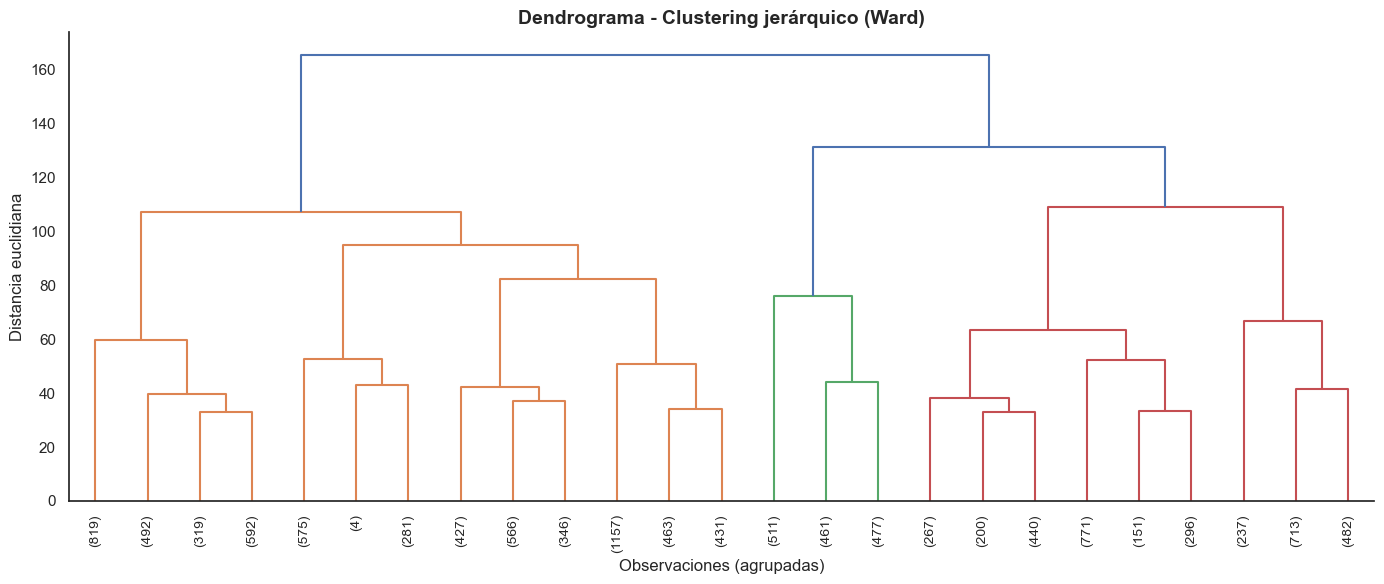

In [31]:
# ------------------------------------------------------------
# 6) Cluster Jerárquico - Dendograma 
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# ---------- 1) Cargar base ----------
try:
    df  # si ya existe en memoria, úsalo
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

# ---------- 2) Renombrados (evitar duplicados) ----------
ren = {
    "nivel_ed": "educ",
    "itf": "itf",
    "miembros_hogar": "miembros_hogar",
    "pp3e_tot": "horastrab"
}
# solo renombrar ch06→edad si NO existe 'edad'
if "edad" not in df.columns and "ch06" in df.columns:
    ren["ch06"] = "edad"

df_hc = df.rename(columns=ren).copy()

# Si quedó más de una 'edad', coalesce y deja una sola
if (df_hc.columns == "edad").sum() > 1:
    tmp = df_hc.loc[:, df_hc.columns == "edad"]
    df_hc["edad"] = pd.to_numeric(tmp.bfill(axis=1).iloc[:, 0], errors="coerce")
    df_hc = df_hc.loc[:, ~((df_hc.columns == "edad") & df_hc.columns.duplicated(keep="first"))]
else:
    if "edad" in df_hc.columns:
        df_hc["edad"] = pd.to_numeric(df_hc["edad"], errors="coerce")

# Construir horastrab si no quedó tras el rename y existen ambas columnas
if "horastrab" not in df_hc.columns and {"pp3e_tot", "pp3f_tot"}.issubset(df_hc.columns):
    df_hc["horastrab"] = (
        pd.to_numeric(df_hc["pp3e_tot"], errors="coerce").fillna(0) +
        pd.to_numeric(df_hc["pp3f_tot"], errors="coerce").fillna(0)
    )

# ---------- 3) Variables y derivadas ----------
df_hc["edad2"] = df_hc["edad"]**2

vars_hc = ["edad", "edad2", "educ", "itf", "miembros_hogar", "horastrab"]
faltan = [v for v in vars_hc if v not in df_hc.columns]
if faltan:
    raise ValueError(f"Faltan columnas para el dendrograma: {faltan}")

X = df_hc[vars_hc].apply(pd.to_numeric, errors="coerce").dropna()

# ---------- 4) Estandarizar ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- 5) Linkage (Ward) ----------
Z = linkage(X_scaled, method="ward")

# ---------- 6) Dendrograma ----------
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor("white")
sns.despine(ax=ax)

dendrogram(
    Z,
    truncate_mode="lastp",
    p=25,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.7 * np.max(Z[:, 2]),
)

plt.title("Dendrograma - Clustering jerárquico (Ward)", fontsize=14, weight="bold")
plt.xlabel("Observaciones (agrupadas)")
plt.ylabel("Distancia euclidiana")
plt.tight_layout()
plt.show()




In [32]:
# ------------------------------------------------------------
# 6) Asignación de clusters jerárquicos
# ------------------------------------------------------------
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np

# Guards: objetos del bloque del dendrograma
for obj in ["Z", "df_hc", "vars_hc"]:
    if obj not in globals():
        raise RuntimeError(f"Definí '{obj}' en el bloque del dendrograma antes de este bloque.")

# 1) Reconstruir EXACTAMENTE el subconjunto usado para linkage (coerción + dropna)
X_clean = df_hc[vars_hc].apply(pd.to_numeric, errors="coerce").dropna()
idx = X_clean.index

# 2) Cortar el dendrograma en k clusters
k = 4
clusters_hc = fcluster(Z, t=k, criterion="maxclust").astype(int)

# Chequeo de longitudes (debe coincidir con len(X_clean))
if len(clusters_hc) != len(X_clean):
    raise ValueError(
        f"Dimensiones no coinciden: clusters={len(clusters_hc)} vs X_clean={len(X_clean)}. "
        "Asegurate de no rehacer Z con otro filtrado."
    )

# 3) Construir DataFrame alineado y etiquetar clusters
df_hc_clusters = df_hc.loc[idx].copy()
df_hc_clusters["cluster_hc"] = clusters_hc

# 4) Resumen por cluster
tabla_clusters = (
    df_hc_clusters
    .groupby("cluster_hc", as_index=False)[vars_hc]
    .mean()
    .round(2)
)

sizes = (
    df_hc_clusters["cluster_hc"]
    .value_counts(dropna=False)
    .rename_axis("cluster_hc")
    .reset_index(name="n_obs")
    .sort_values("cluster_hc")
)
sizes["share_%"] = (sizes["n_obs"] / sizes["n_obs"].sum() * 100).round(1)

tabla_clusters = tabla_clusters.merge(sizes, on="cluster_hc", how="left")

from IPython.display import display
print("Resumen de clusters jerárquicos (Ward):")
display(tabla_clusters)



Resumen de clusters jerárquicos (Ward):


,cluster_hc,edad,edad2,educ,educ,itf,miembros_hogar,horastrab,horastrab,n_obs,share_%
0,1,38.18,1603.10,4.89,13.94,786352.07,3.39,37.29,38.88,6472,56.4
1,2,58.78,3517.38,2.96,8.52,387398.42,2.88,19.63,20.30,1449,12.6
2,3,38.97,1653.68,2.53,7.46,268796.78,4.01,53.80,54.71,2125,18.5
3,4,34.74,1292.50,2.80,8.38,408769.59,4.88,17.79,18.45,1432,12.5


## Ejercicio 7. Clúster K - modas


Tamaño de los clusters (k=2):
cluster_kmodes_2
0    15791
1    12663
Name: count, dtype: int64

Tamaño de los clusters (k=4):
cluster_kmodes_4
0    8481
1    7954
2    7435
3    4584
Name: count, dtype: int64

Tamaño de los clusters (k=10):
cluster_kmodes_10
0    4622
1    2223
2    1164
3    3085
4    2058
5    4876
6    3550
7    3384
8    2145
9    1347
Name: count, dtype: int64


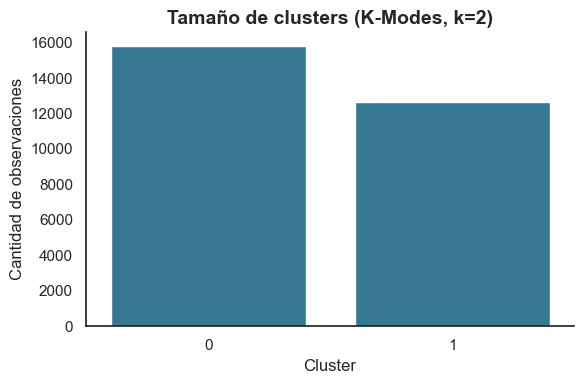


Comparación K=2 vs pobreza (proporciones por cluster):


pobre,0,1
cluster_kmodes_2,,
0,0.538,0.462
1,0.621,0.379


In [33]:
# ------------------------------------------------------------
# 7) Cluster K - Modas  
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

# 1) Base (usa df en memoria o carga)
try:
    df
except NameError:
    df = pd.read_csv("eph_tp2_05_25.csv", low_memory=False)

df_work = df.copy()  # no pisamos el df principal

# 2) Variables categóricas
vars_kmodes = ["ch04","cat_ocup","estado","pp04a","ch07","pp10a","nivel_ed","cat_inac"]
faltan = [c for c in vars_kmodes if c not in df_work.columns]
if faltan:
    raise KeyError(f"Faltan columnas para kmodes: {faltan}")

# Categóricas limpias (strings, sin NaN)
X_cat = (
    df_work[vars_kmodes]
      .astype(str)                # fuerza string
      .fillna("NoResponde")       # reemplaza faltantes
      .values                     # numpy array (n, p)
)

# 3) Ejecutar K-Modes con k = 2, 4, 10 (sin dummies)
sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

km_results = {}
for k in [2, 4, 10]:
    km = KModes(n_clusters=k, init="Huang", n_init=20, random_state=133660)
    cl = km.fit_predict(X_cat)
    km_results[k] = cl
    df_work[f"cluster_kmodes_{k}"] = cl

# 4) Resumen de tamaños
for k in [2, 4, 10]:
    print(f"\nTamaño de los clusters (k={k}):")
    print(df_work[f"cluster_kmodes_{k}"].value_counts().sort_index())

# 5) Visualización (k=2)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df_work["cluster_kmodes_2"], color=palette_tp1[0])
ax.set_title("Tamaño de clusters (K-Modes, k=2)", fontsize=14, weight="bold")
ax.set_xlabel("Cluster")
ax.set_ylabel("Cantidad de observaciones")
sns.despine(ax=ax)
ax.set_facecolor("white")
plt.tight_layout()
plt.show()

# 6) Comparar con pobreza (si existe)
if "pobre" in df_work.columns:
    print("\nComparación K=2 vs pobreza (proporciones por cluster):")
    from IPython.display import display
    ct = pd.crosstab(df_work["cluster_kmodes_2"], df_work["pobre"], normalize="index").round(3)
    display(ct)




Distribución porcentual de pobreza por cluster (k=2):


pobre_bin,No pobre,Pobre
cluster_kmodes_2,,
0,53.8,46.2
1,62.1,37.9


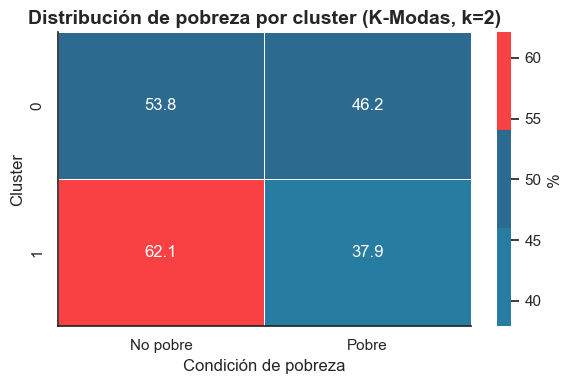

In [34]:
# ------------------------------------------------------------
# 7) Heatmap del Cluster K - Modas (k = 2) 
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 0) Precondiciones mínimas ----------
try:
    df
except NameError:
    raise RuntimeError("Falta `df`. Ejecutá antes el bloque inicial (carga + AE + CBT + `pobre`).")

if "pobre" not in df.columns:
    raise RuntimeError("Falta `pobre` en `df`. Generala en el bloque de AE+CBT antes de seguir.")

# Elegir base con clusters k-modes
if "df_work" in globals() and isinstance(df_work, pd.DataFrame) and ("cluster_kmodes_2" in df_work.columns):
    base = df_work.copy()
else:
    base = df.copy()
    if "cluster_kmodes_2" not in base.columns:
        raise RuntimeError("Falta `cluster_kmodes_2`. Corré antes el bloque de K-Modes (k=2).")

# ---------- 1) Incorporar/normalizar columna de pobreza en `base` ----------
if "pobre" not in base.columns:
    # Intento 1: si los índices tienen misma longitud y orden, copio por posición
    if len(base) == len(df):
        base["pobre"] = df["pobre"].to_numpy()
    else:
        # Intento 2: si existen llaves de hogar/persona, intentá un merge (ajustá si tenés otras llaves)
        keys = [k for k in ["anio","codusu","nro_hogar","componente"] if k in base.columns and k in df.columns]
        if keys:
            base = base.merge(df[keys+["pobre"]].drop_duplicates(keys), on=keys, how="left", suffixes=("",""))
        else:
            raise RuntimeError("No pude alinear `pobre` con `base`. Verificá que `df_work` y `df` tengan mismo orden o llaves en común.")

# Normalizar a binaria 0/1
y = base["pobre"]
if y.dtype.kind in "biu":
    y_bin = y.fillna(0).astype(int)
else:
    y_bin = (
        y.astype(str).str.strip().str.lower()
         .map({"pobre":1, "si":1, "sí":1, "1":1, "true":1, "t":1,
               "no pobre":0, "nopobre":0, "no":0, "0":0, "false":0, "f":0})
         .fillna(0).astype(int)
    )
base["pobre_bin"] = y_bin

# ---------- 2) Tabla de contingencia y heatmap ----------
if "cluster_kmodes_2" not in base.columns:
    raise RuntimeError("No existe `cluster_kmodes_2` en la base final.")

tabla_heat = (
    pd.crosstab(base["cluster_kmodes_2"], base["pobre_bin"], normalize="index")
      .rename(columns={0: "No pobre", 1: "Pobre"})
      .round(3)
)

print("\nDistribución porcentual de pobreza por cluster (k=2):")
from IPython.display import display
display((tabla_heat * 100).round(1))

sns.set_theme(style="white")
palette_tp1 = ["#277DA1", "#2C6B8F", "#F94144"]

plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    tabla_heat * 100,
    annot=True, fmt=".1f",
    cmap=sns.color_palette(palette_tp1, as_cmap=True),
    cbar_kws={"label": "%"},
    linewidths=0.5
)
ax.set_title("Distribución de pobreza por cluster (K-Modas, k=2)", fontsize=14, weight="bold")
ax.set_xlabel("Condición de pobreza")
ax.set_ylabel("Cluster")
sns.despine(ax=ax)
ax.set_facecolor("white")
plt.tight_layout()
plt.show()



In [35]:
### FIN DEL CÓDIGO